In [44]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

In [45]:
!nvidia-smi

Sun Apr 24 14:25:50 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:05:00.0 Off |                  N/A |
| 61%   68C    P2   116W / 320W |   4528MiB / 10240MiB |     15%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA TITAN RTX    On   | 00000000:09:00.0 Off |                  N/A |
| 55%   

In [62]:
user_item_mtx = np.zeros((200, 200))

In [4]:
# 복잡하니까 장르는 일단 1가지로 통일.

In [63]:
import random

In [64]:
random.seed(1)
for i in range(200):
    print(i)
    for j in range(200):
        if (i < j):
            #user_item_mtx[i,1000-j-1] = np.random.binomial(1, 0.95, 1)[0]
            user_item_mtx[i,200-j-1] = 1            
        if (i > j):
            #user_item_mtx[i,1000-j-1] = np.random.binomial(1, 0.05, 1)[0]
            user_item_mtx[i,200-j-1] = 0

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [12]:
#user_item_mtx[1, 200 - 1] = 1
#user_item_mtx[200-1, 0] = 1

In [65]:
user_item_mtx

array([[1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [66]:
user_item_mtx2 = np.ones((200, 200)) 
user_item_mtx2[:, 199] = 0

In [67]:
user_item_mtx2

array([[1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 0.]])

In [68]:
user_item_mtx = np.concatenate((user_item_mtx, user_item_mtx2), axis = 0)

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

<AxesSubplot:>

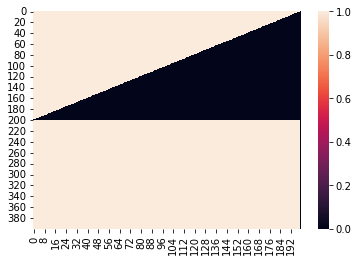

In [70]:
sns.heatmap(user_item_mtx)

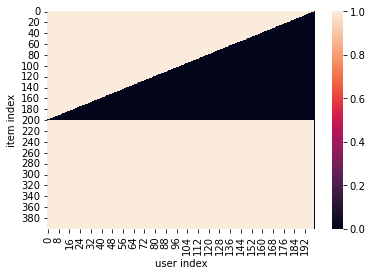

In [71]:
ax = plt.axes()
sns.heatmap(user_item_mtx, ax = ax)

ax.set_xlabel('user index')
ax.set_ylabel('item index')
plt.show()

In [72]:
data2 = pd.DataFrame(user_item_mtx)

In [73]:
data2 = data2.unstack().reset_index()
data2.columns = ['sid', 'uid', 'ratings']

In [74]:
pos_data = data2[data2['ratings'] == 1.0]

In [75]:
data2 = data2[['uid', 'sid']]

In [76]:
total_data = data2

In [77]:
train_df = pos_data[['uid', 'sid']].reset_index()[['uid', 'sid']]

In [78]:
test_df = train_df

In [79]:
val_df = train_df

In [80]:
#data2.to_csv('real_total_df', index = False)
pos_data.to_csv('total_df', index = False)
train_df.to_csv('train_df', index = False)
#neg_sample_df.to_csv('neg_sample_df', index = False)

val_df.to_csv('val_df', index = False)
#val_df_with_neg.to_csv('val_df_with_neg', index = False)

test_df.to_csv('test_df', index = False)
#test_df_with_neg.to_csv('test_df_with_neg', index = False)

In [81]:
uid_pop_total = pos_data.uid.value_counts().reset_index()
uid_pop_total.columns = ['uid', 'total_counts']

sid_pop_total = pos_data.sid.value_counts().reset_index()
sid_pop_total.columns = ['sid', 'total_counts']

In [82]:
uid_pop_train = train_df.uid.value_counts().reset_index()
uid_pop_train.columns = ['uid', 'train_counts']

sid_pop_train = train_df.sid.value_counts().reset_index()
sid_pop_train.columns = ['sid', 'train_counts']

In [83]:
uid_pop_total.to_csv('uid_pop_total', index = False)
sid_pop_total.to_csv('sid_pop_total', index = False)

uid_pop_train.to_csv('uid_pop_train', index = False)
sid_pop_train.to_csv('sid_pop_train', index = False)

In [125]:
import seaborn as sns

<AxesSubplot:xlabel='sid', ylabel='uid'>

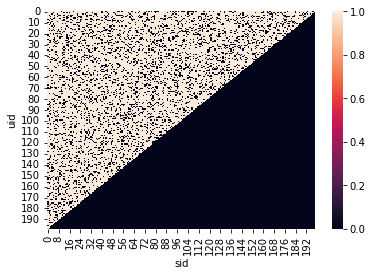

In [126]:
tmp = train_df
tmp['one'] = 1

sns.heatmap(tmp.pivot_table(index = 'uid', columns = 'sid', values = 'one', fill_value = 0))

<AxesSubplot:xlabel='sid', ylabel='uid'>

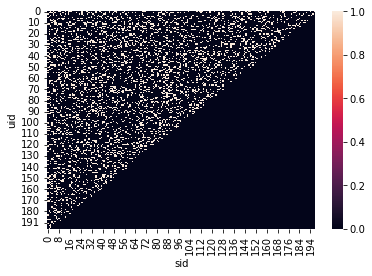

In [127]:
tmp = val_df
tmp['one'] = 1

sns.heatmap(tmp.pivot_table(index = 'uid', columns = 'sid', values = 'one', fill_value = 0))

<AxesSubplot:xlabel='sid', ylabel='uid'>

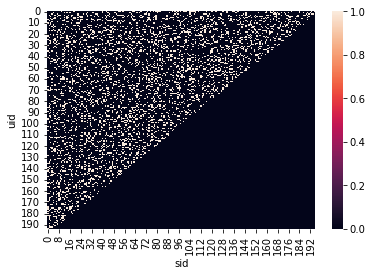

In [128]:
tmp = test_df
tmp['one'] = 1

sns.heatmap(tmp.pivot_table(index = 'uid', columns = 'sid', values = 'one', fill_value = 0))

<AxesSubplot:xlabel='sid', ylabel='uid'>

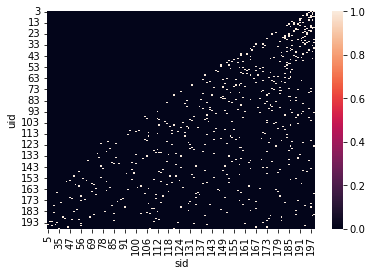

In [129]:
tmp = neg_sample_df
tmp['one'] = 1

sns.heatmap(tmp.pivot_table(index = 'uid', columns = 'sid', values = 'one', fill_value = 0))